# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
print(weather_api_key)

b18a6c6caeec379104478408ff71045c


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 600
['saleaula', 'rikitea', 'huntingdon', 'jamestown', 'bandraboua', 'ulladulla', 'turtas', 'albany', 'katobu', 'ushuaia', 'nuuk', 'chunoyar', 'mataura', 'akyab', 'chokurdakh', 'provideniya', 'luderitz', 'bredasdorp', 'ribeira grande', 'atuona', 'mahebourg', 'mahbubabad', 'belushya guba', 'port alfred', 'sfantu gheorghe', 'punta arenas', 'siavonga', 'cape town', 'faanui', 'arraial do cabo', 'vaini', 'cherskiy', 'hilo', 'payakumbuh', 'tabuk', 'kapaa', 'hithadhoo', 'qaanaaq', 'hirara', 'vao', 'taolanaro', 'notre-dame-du-lac', 'adrar', 'ancud', 'geraldton', 'port lincoln', 'illoqqortoormiut', 'busselton', 'avera', 'lorengau', 'torbay', 'kankon', 'hobart', 'ahuimanu', 'santa vitoria do palmar', 'thompson', 'tolaga bay', 'samusu', 'grindavik', 'yellowknife', 'avarua', 'bluff', 'chuy', 'hermanus', 'barrow', 'turukhansk', 'sentyabrskiy', 'kudahuvadhoo', 'nizhneyansk', 'sturgeon bay', 'norman wells', 'tevaitoa', 'axim', 'lebu', 'new norfolk', 'hamilton', 'georgeto

---

In [4]:
city="flin flon"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = query_url + city
response = requests.get(city_url).json()
print(response)

{'coord': {'lon': -101.865, 'lat': 54.7682}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -14.09, 'feels_like': -18.98, 'temp_min': -14.09, 'temp_max': -14.09, 'pressure': 1028, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1668123033, 'sys': {'type': 1, 'id': 782, 'country': 'CA', 'sunrise': 1668089327, 'sunset': 1668120846}, 'timezone': -21600, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | huntingdon
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | bandraboua
Processing Record 6 of Set 1 | ulladulla
Processing Record 7 of Set 1 | turtas
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | katobu
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | nuuk
Processing Record 12 of Set 1 | chunoyar
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | akyab
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | mahbubabad
Processing Reco

Processing Record 37 of Set 4 | karasburg
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | khandyga
Processing Record 40 of Set 4 | kurilsk
Processing Record 41 of Set 4 | medeiros neto
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | kikwit
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | sao joao da barra
Processing Record 0 of Set 5 | santa rosa
Processing Record 1 of Set 5 | santa ines
Processing Record 2 of Set 5 | goure
Processing Record 3 of Set 5 | sakakah
Processing Record 4 of Set 5 | teya
Processing Record 5 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 6 of Set 5 | san jeronimo
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | sibolga
Processing Record 9 of Set 5 | pring

Processing Record 26 of Set 8 | tromso
Processing Record 27 of Set 8 | muzquiz
City not found. Skipping...
Processing Record 28 of Set 8 | pangnirtung
Processing Record 29 of Set 8 | nishihara
Processing Record 30 of Set 8 | kommunar
Processing Record 31 of Set 8 | amderma
City not found. Skipping...
Processing Record 32 of Set 8 | itupiranga
Processing Record 33 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 34 of Set 8 | cibitoke
Processing Record 35 of Set 8 | senno
Processing Record 36 of Set 8 | presidencia roque saenz pena
Processing Record 37 of Set 8 | rawlins
Processing Record 38 of Set 8 | tommot
Processing Record 39 of Set 8 | petropavlovskoye
Processing Record 40 of Set 8 | talawdi
City not found. Skipping...
Processing Record 41 of Set 8 | khonuu
City not found. Skipping...
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | merritt
Processing Record 44 of Set 8 | tramandai
Processing Record 45 of Set 8 | la quinta
Processing Record 46 

Processing Record 10 of Set 12 | olafsvik
Processing Record 11 of Set 12 | nanortalik
Processing Record 12 of Set 12 | beyneu
Processing Record 13 of Set 12 | saldanha
Processing Record 14 of Set 12 | maldonado
Processing Record 15 of Set 12 | labrea
Processing Record 16 of Set 12 | moranbah
Processing Record 17 of Set 12 | mogochin
City not found. Skipping...
Processing Record 18 of Set 12 | springfield
Processing Record 19 of Set 12 | douentza
Processing Record 20 of Set 12 | tucupita
Processing Record 21 of Set 12 | ambon
Processing Record 22 of Set 12 | awjilah
Processing Record 23 of Set 12 | doka
Processing Record 24 of Set 12 | port moresby
Processing Record 25 of Set 12 | grand gaube
Processing Record 26 of Set 12 | san juan
Processing Record 27 of Set 12 | nautla
Processing Record 28 of Set 12 | maua
Processing Record 29 of Set 12 | benin
Processing Record 30 of Set 12 | walvis bay
Processing Record 31 of Set 12 | jvari
Processing Record 32 of Set 12 | barmer
Processing Record

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,23.34,83,100,2.63,PF,1668135535
1,huntingdon,52.3305,-0.1865,15.52,79,99,3.58,GB,1668135535
2,jamestown,42.0970,-79.2353,16.77,50,0,4.63,US,1668135145
3,bandraboua,-12.7044,45.1223,25.82,78,10,4.13,YT,1668135536
4,ulladulla,-35.3500,150.4667,20.49,69,100,2.54,AU,1668135536


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.34,83,100,2.63,PF,1668135535
1,huntingdon,52.3305,-0.1865,15.52,79,99,3.58,GB,1668135535
2,jamestown,42.0970,-79.2353,16.77,50,0,4.63,US,1668135145
3,bandraboua,-12.7044,45.1223,25.82,78,10,4.13,YT,1668135536
4,ulladulla,-35.3500,150.4667,20.49,69,100,2.54,AU,1668135536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

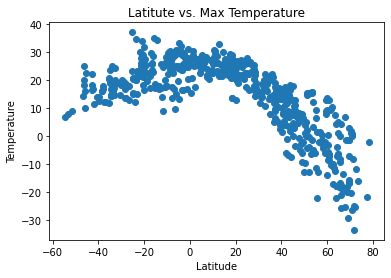

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitute vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

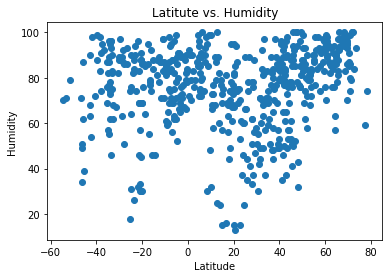

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitute vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

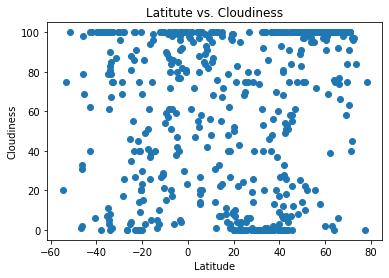

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitute vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

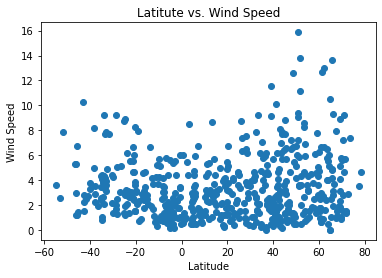

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitute vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def regressionCalc(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,np.mean(y_values)),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    print("\nLine Equation: " + line_eq)
    return

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,huntingdon,52.3305,-0.1865,15.52,79,99,3.58,GB,1668135535
2,jamestown,42.0970,-79.2353,16.77,50,0,4.63,US,1668135145
5,turtas,58.9417,69.1325,-2.03,97,100,1.39,RU,1668135537
6,albany,42.6001,-73.9662,11.92,81,49,1.01,US,1668135336
9,nuuk,64.1835,-51.7216,-7.16,57,100,4.00,GL,1668135538


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.34,83,100,2.63,PF,1668135535
3,bandraboua,-12.7044,45.1223,25.82,78,10,4.13,YT,1668135536
4,ulladulla,-35.3500,150.4667,20.49,69,100,2.54,AU,1668135536
7,katobu,-4.9408,122.5276,33.20,52,42,0.16,ID,1668135537
8,ushuaia,-54.8000,-68.3000,6.81,70,20,3.60,AR,1668135538


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8573620806841644

Line Equation: y = -0.6x + 33.43


Text(0.5, 1.0, 'Latitute vs. Max Temperature (Northern)')

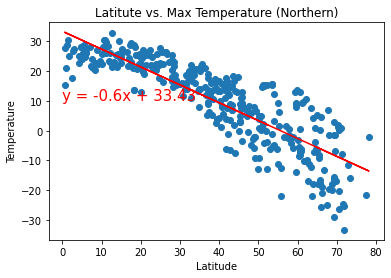

In [68]:
# Linear regression on Northern Hemisphere
regressionCalc(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitute vs. Max Temperature (Northern)')

The r-value is: 0.5404746142467165

Line Equation: y = 0.24x + 26.47


Text(0.5, 1.0, 'Latitute vs. Max Temperature (Southern)')

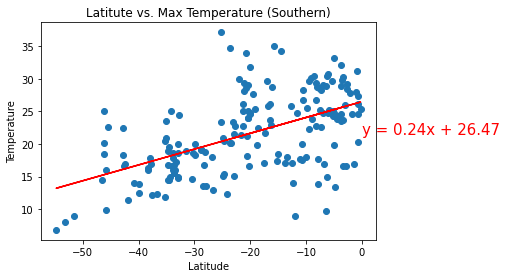

In [69]:
# Linear regression on Southern Hemisphere
regressionCalc(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitute vs. Max Temperature (Southern)')

**Discussion about the linear relationship:** As expected, temperature decreases as you get further from the equator. Interestingly, the correlation is significantly stronger in the Northern Hemisphere for this data set.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29919701355612005

Line Equation: y = 0.27x + 65.6


Text(0.5, 1.0, 'Latitute vs. Humidity (Northern)')

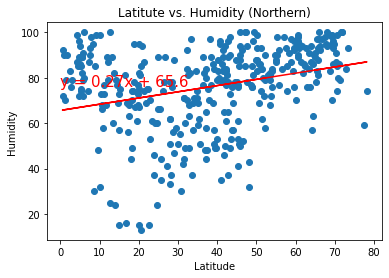

In [70]:
# Northern Hemisphere
regressionCalc(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitute vs. Humidity (Northern)')

The r-value is: 0.09424920014719512

Line Equation: y = 0.12x + 78.15


Text(0.5, 1.0, 'Latitute vs. Humidity (Southern)')

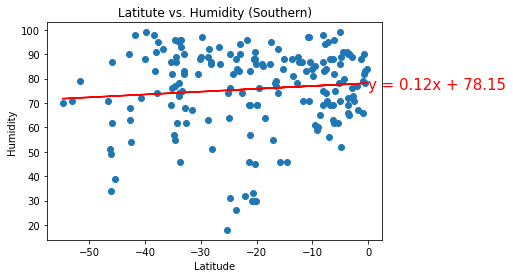

In [71]:
# Southern Hemisphere
regressionCalc(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitute vs. Humidity (Southern)')

**Discussion about the linear relationship:** There appears not to be a significant correlation between latitude and humidity. While our data shows a slight positive correlation in the Northern Hemisphere, there is virtually no correlation in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26703653846775677

Line Equation: y = 0.53x + 40.96


Text(0.5, 1.0, 'Latitute vs. Cloudiness (Northern)')

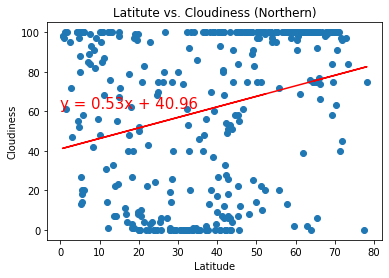

In [72]:
# Northern Hemisphere
regressionCalc(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitute vs. Cloudiness (Northern)')

The r-value is: 0.07311178583680653

Line Equation: y = 0.2x + 64.97


Text(0.5, 1.0, 'Latitute vs. Cloudiness (Southern)')

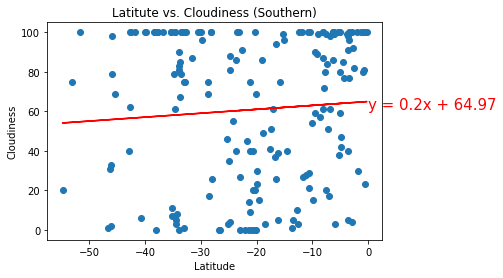

In [73]:
# Southern Hemisphere
regressionCalc(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitute vs. Cloudiness (Southern)')

**Discussion about the linear relationship:** Similar to the relationship between latitude and humidity. In the Northern Hemisphere, this relationship is positive with a week correlation. In the Southern Hemisphere, there is again almost no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1995979623169478

Line Equation: y = 0.03x + 2.47


Text(0.5, 1.0, 'Latitute vs. Wind Speed (Northern)')

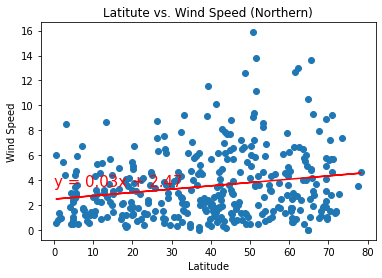

In [74]:
# Northern Hemisphere
regressionCalc(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitute vs. Wind Speed (Northern)')

The r-value is: -0.3061547934184032

Line Equation: y = -0.05x + 2.23


Text(0.5, 1.0, 'Latitute vs. Wind Speed (Southern)')

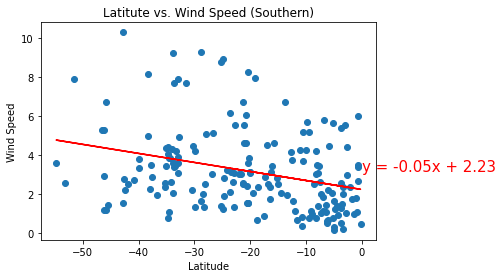

In [75]:
# Southern Hemisphere
regressionCalc(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitute vs. Wind Speed (Southern)')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a weak positive correlation between latitude and cloudiness as you go further North. In the Southern Hemisphere, there is a weak negative correlation (it gets windier as you go further South). This could be explained by artic and antarctic areas being largely tundra with little vegetation to interfere with the wind.